In [1]:
library(ggplot2)
library(RColorBrewer)
library(cowplot)
library(gridExtra)
library(ggsci)
library(scales)
library(viridis)
library(tidyverse)

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.5     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


In [2]:
demux_order <- c('demuxlet','freemuxlet','vireo','vireo_nogenos','souporcell','souporcell_nogenos','demuxalot')
demux_hex = c('#FF3004', '#F98502', '#00A931', '#48D571', '#033B91', '#376BBB', '#664110')

length(demux_hex)

[1] 7

In [3]:
demux_names <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes','souporcell','souporcell, no genotypes','demuxalot')


In [4]:
igvf_palette <- c('#F44336','#5F3EB6','#01B0E7','#71BB4C','#000000')
# adelus_palette <- c('#F44336','#5F3EB6','#01B0E7','#71BB4C','#FFC911','#795548')

nb.cols <- 14
adelus_palette <- colorRampPalette(brewer.pal(8, "Spectral"))(nb.cols)
### let's make non-singlets black...?
adelus_palette[14] <- '#000000'

In [5]:
num_donors = 12
donor_list <- c()

for (i in 1:num_donors) {
  donor_list <- c(donor_list, paste0('donor', i))
}
donor_list <- c('donor0', donor_list, 'non_singlet')
donor_list

[1] "donor0"      "donor1"      "donor2"      "donor3"      "donor4"     
 [6] "donor5"      "donor6"      "donor7"      "donor8"      "donor9"     
[11] "donor10"     "donor11"     "donor12"     "non_singlet"

In [6]:
igvf_dir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'
adelus_dir = '/u/project/cluo/terencew/demux_benchmark/adelus_2023/'

In [7]:
igvf_gex_sings = read.table(paste0(igvf_dir, 'csv/final_figures/figure4/figure_s7_gex_dist.csv'), sep='\t', header=1)
igvf_atac_sings = read.table(paste0(igvf_dir, 'csv/final_figures/figure4/figure_s7_atac_dist.csv'), sep='\t', header=1)

Warning message in file(file, "rt"):
“cannot open file '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/csv/final_figures/figure4/figure_s7_gex_dist.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
adelus_gex_sings = read.table(paste0(adelus_dir, 'csv/final_figures/figure4/figure_s7_gex_dist.csv'), sep='\t', header=1)
adelus_atac_sings = read.table(paste0(adelus_dir, 'csv/final_figures/figure4/figure_s7_atac_dist.csv'), sep='\t', header=1)

In [ ]:
adelus_gex_sings$value <- factor(adelus_gex_sings$value, levels = donor_list)
adelus_atac_sings$value <- factor(adelus_atac_sings$value, levels = donor_list)

In [ ]:
gex_methods <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                               'scsplit', 'scsplit_nogenos',
                               'souporcell','souporcell_nogenos','demuxalot')

atac_methods <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                               'scsplit', 'scsplit_nogenos',
                               'souporcell','souporcell_nogenos','scavengers')


gex_names <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes',
                               'scsplit', 'scsplit, no genotypes',
                               'souporcell','souporcell, no genotypes', 'demuxalot')
atac_names <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes',
                               'scsplit', 'scsplit, no genotypes',
                               'souporcell','souporcell, no genotypes','scavengers')

In [ ]:
gex_dict <- setNames(gex_names, gex_methods)
atac_dict <- setNames(atac_names, atac_methods)

In [ ]:
gex_dict

In [ ]:
igvf_gex_sings$method_name <- gex_dict[igvf_gex_sings$variable]
igvf_atac_sings$method_name <- atac_dict[igvf_atac_sings$variable]
adelus_gex_sings$method_name <- gex_dict[adelus_gex_sings$variable]
adelus_atac_sings$method_name <- atac_dict[adelus_atac_sings$variable]

In [ ]:
head(igvf_gex_sings)

In [ ]:
gex_labels <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes',
                               'scsplit', 'scsplit, no genotypes',
                               'souporcell','souporcell, no genotypes','demuxalot')

gex_labels <- rev(gex_labels)

atac_labels <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes',
                               'scsplit', 'scsplit, no genotypes',
                               'souporcell','souporcell, no genotypes','scavengers')

atac_labels <- rev(atac_labels)

igvf_gex_sings$method_name <- factor(igvf_gex_sings$method_name, levels = gex_labels)
igvf_atac_sings$method_name <- factor(igvf_atac_sings$method_name, levels = atac_labels)

adelus_gex_sings$method_name <- factor(adelus_gex_sings$method_name, levels = gex_labels)
adelus_atac_sings$method_name <- factor(adelus_atac_sings$method_name, levels = atac_labels)

In [ ]:
axis_size = 24
title_size = 30

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)

ggplot(igvf_gex_sings, aes(x = method_name, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=0.6),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
#          legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
         legend.position = 'bottom',
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='Assignment') +
  guides(fill = guide_legend(title = NULL, override.aes = list(size = 1.5)))

In [ ]:
p1 <- ggplot(igvf_gex_sings, aes(x = method_name, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='Assignment', y='# droplets') +
coord_flip()
p1

In [ ]:
options(repr.plot.width=9, repr.plot.height=5)

p1 <- ggplot(igvf_gex_sings, aes(x = method_name, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='Assignment', y='# droplets') +
coord_flip()
p1

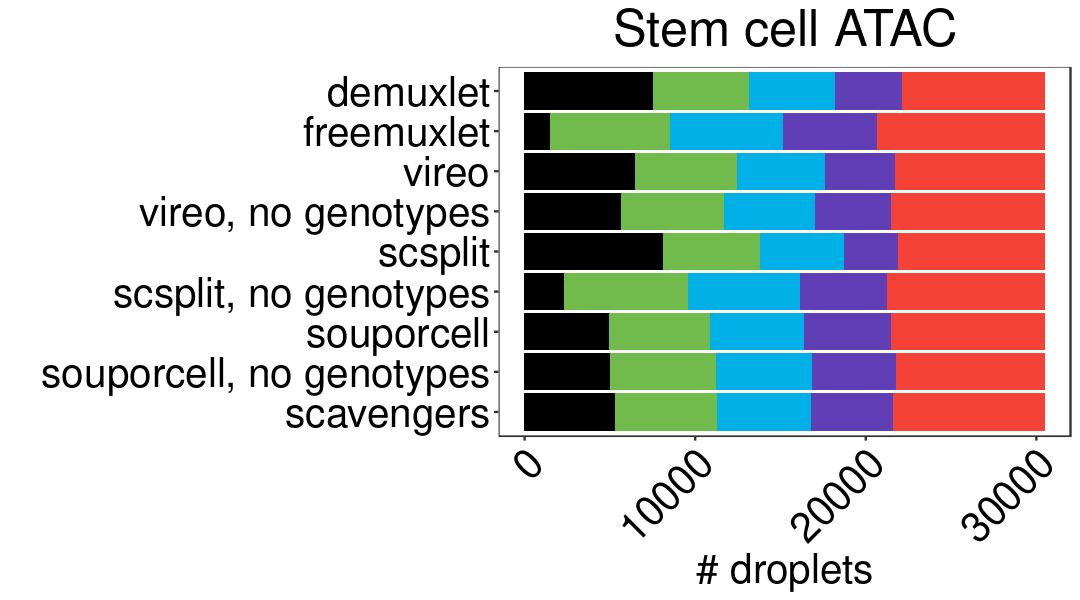

In [153]:
options(repr.plot.width=9, repr.plot.height=5)

p2 <- ggplot(igvf_atac_sings, aes(x = method_name, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell ATAC",fill='Assignment', y='# droplets') +
coord_flip()
p2

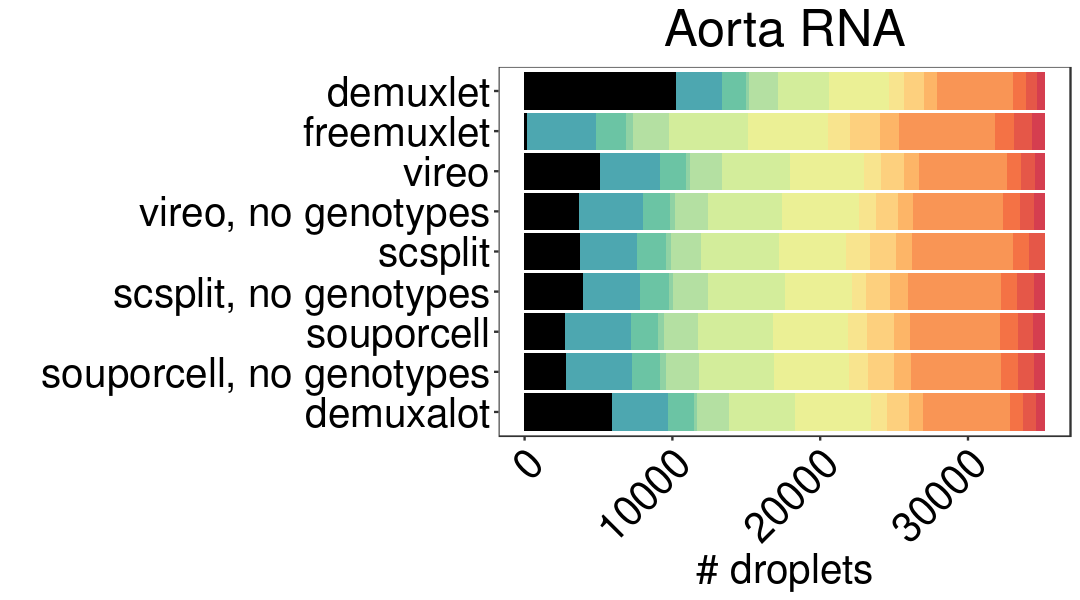

In [154]:
options(repr.plot.width=9, repr.plot.height=5)

p3 <- ggplot(adelus_gex_sings, aes(x = method_name, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta RNA",fill='Assignment', y='# droplets') +
coord_flip()
p3

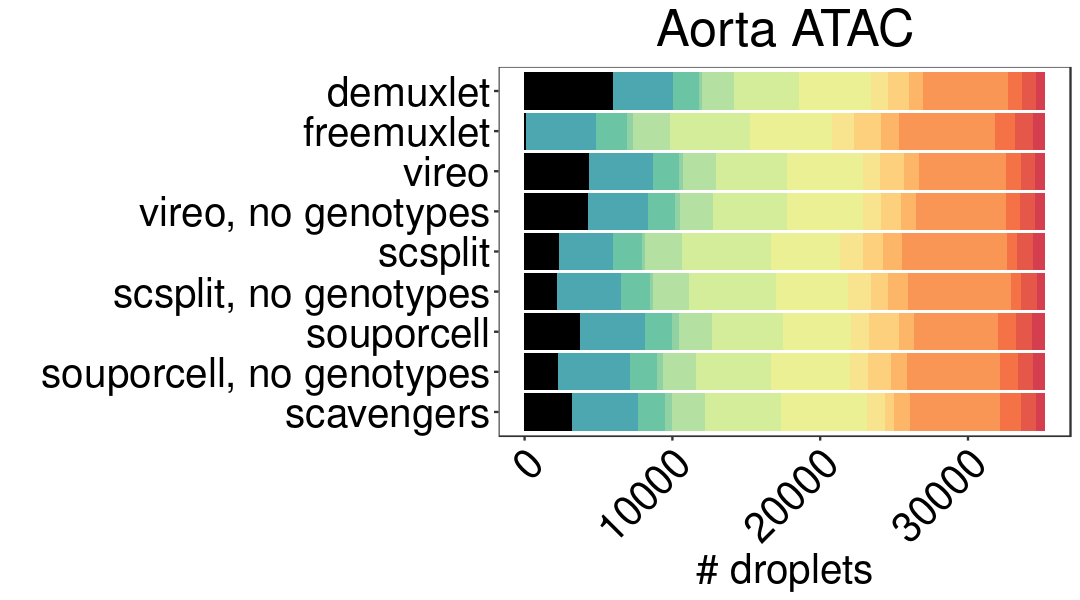

In [155]:
options(repr.plot.width=9, repr.plot.height=5)

p4 <- ggplot(adelus_atac_sings, aes(x = method_name, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta ATAC",fill='Assignment', y='# droplets') +
coord_flip()
p4

### legends

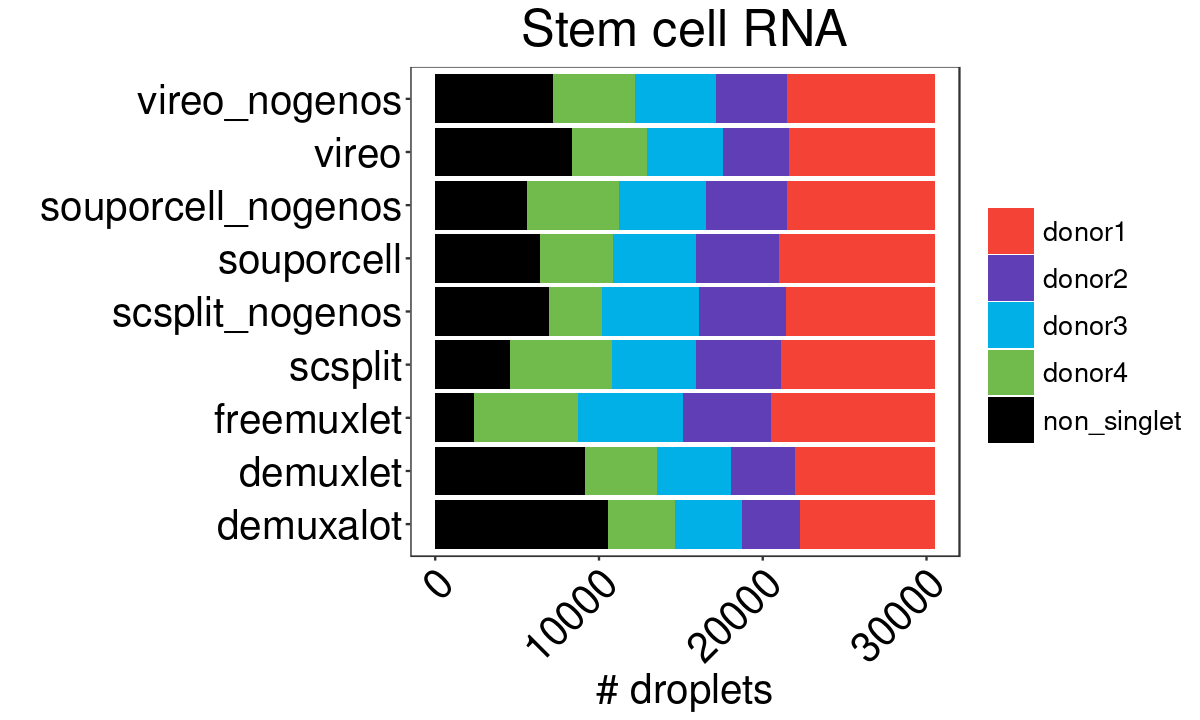

In [101]:
p1 <- ggplot(igvf_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'right',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='', y='# droplets') +
coord_flip()
p1

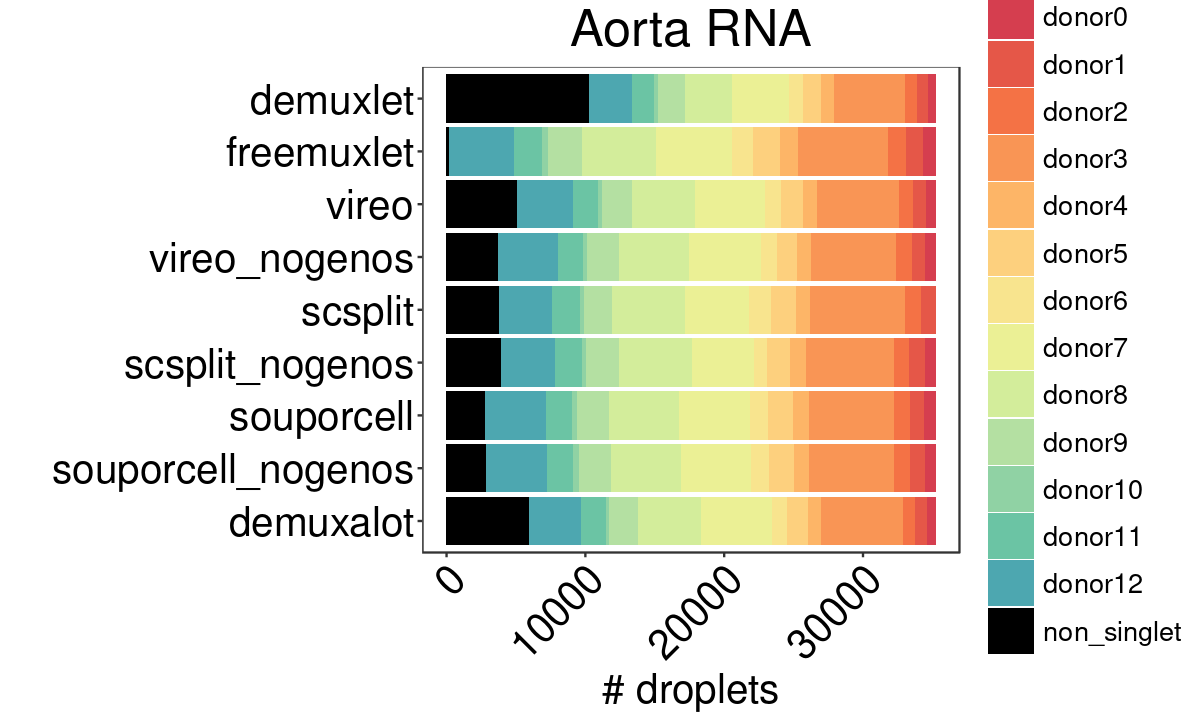

In [32]:
p1 <- ggplot(adelus_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'right',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta RNA",fill='', y='# droplets') +
coord_flip()
p1

### sandbox

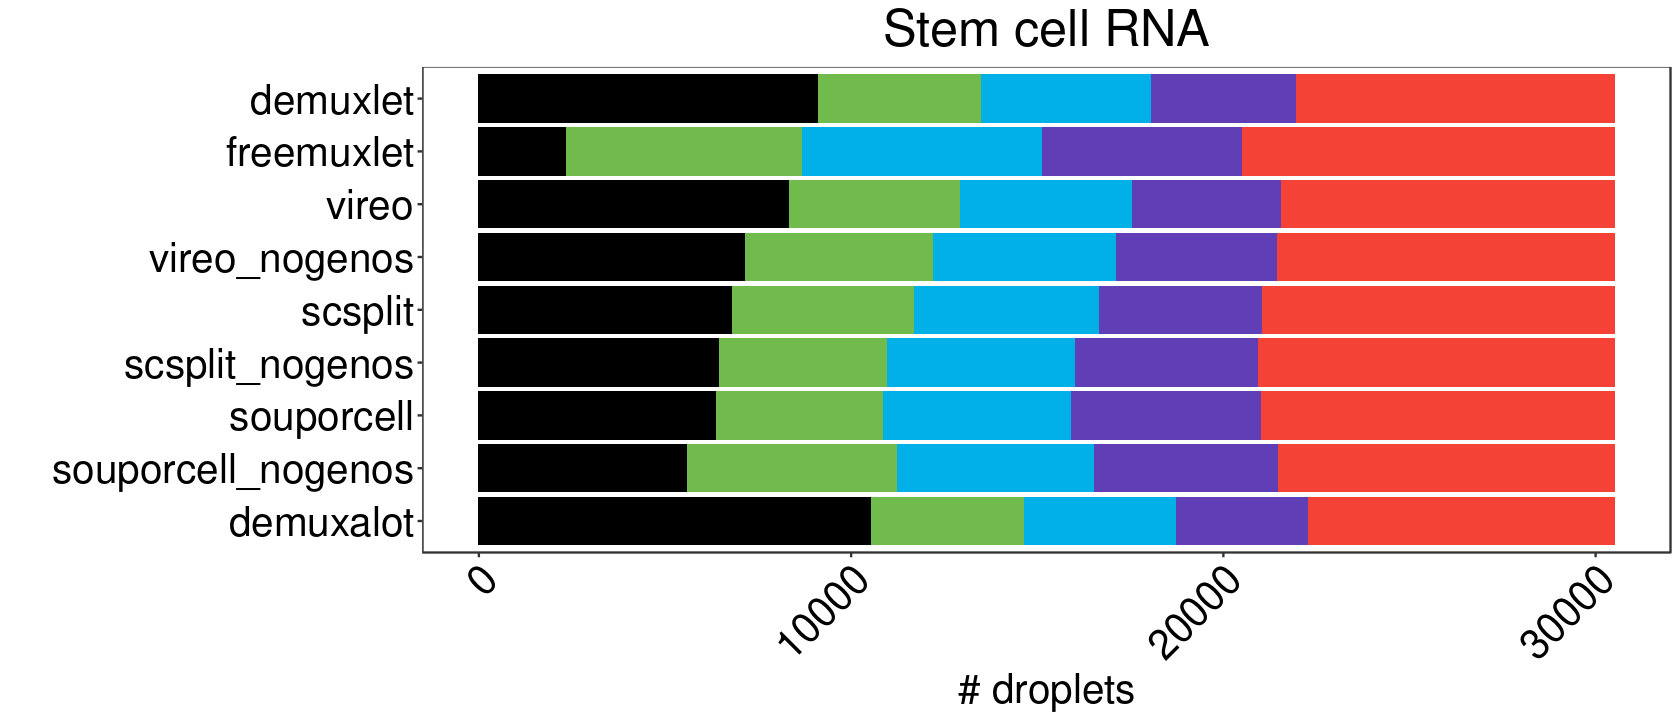

In [36]:
p1 <- ggplot(igvf_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='Assignment', y='# droplets') +
coord_flip()
p1

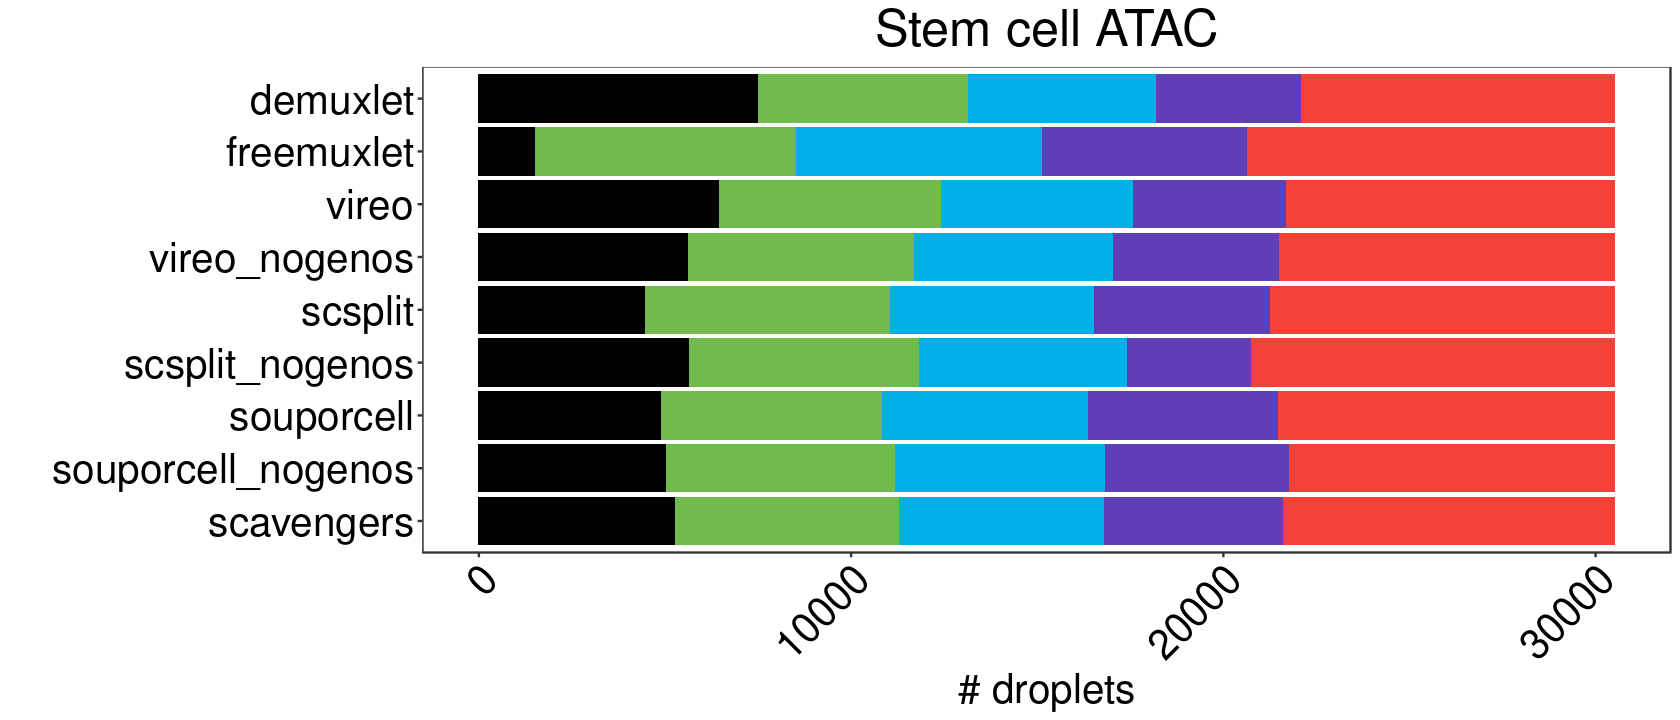

In [37]:
p2 <- ggplot(igvf_atac_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell ATAC",fill='Assignment', y='# droplets') +
coord_flip()
p2

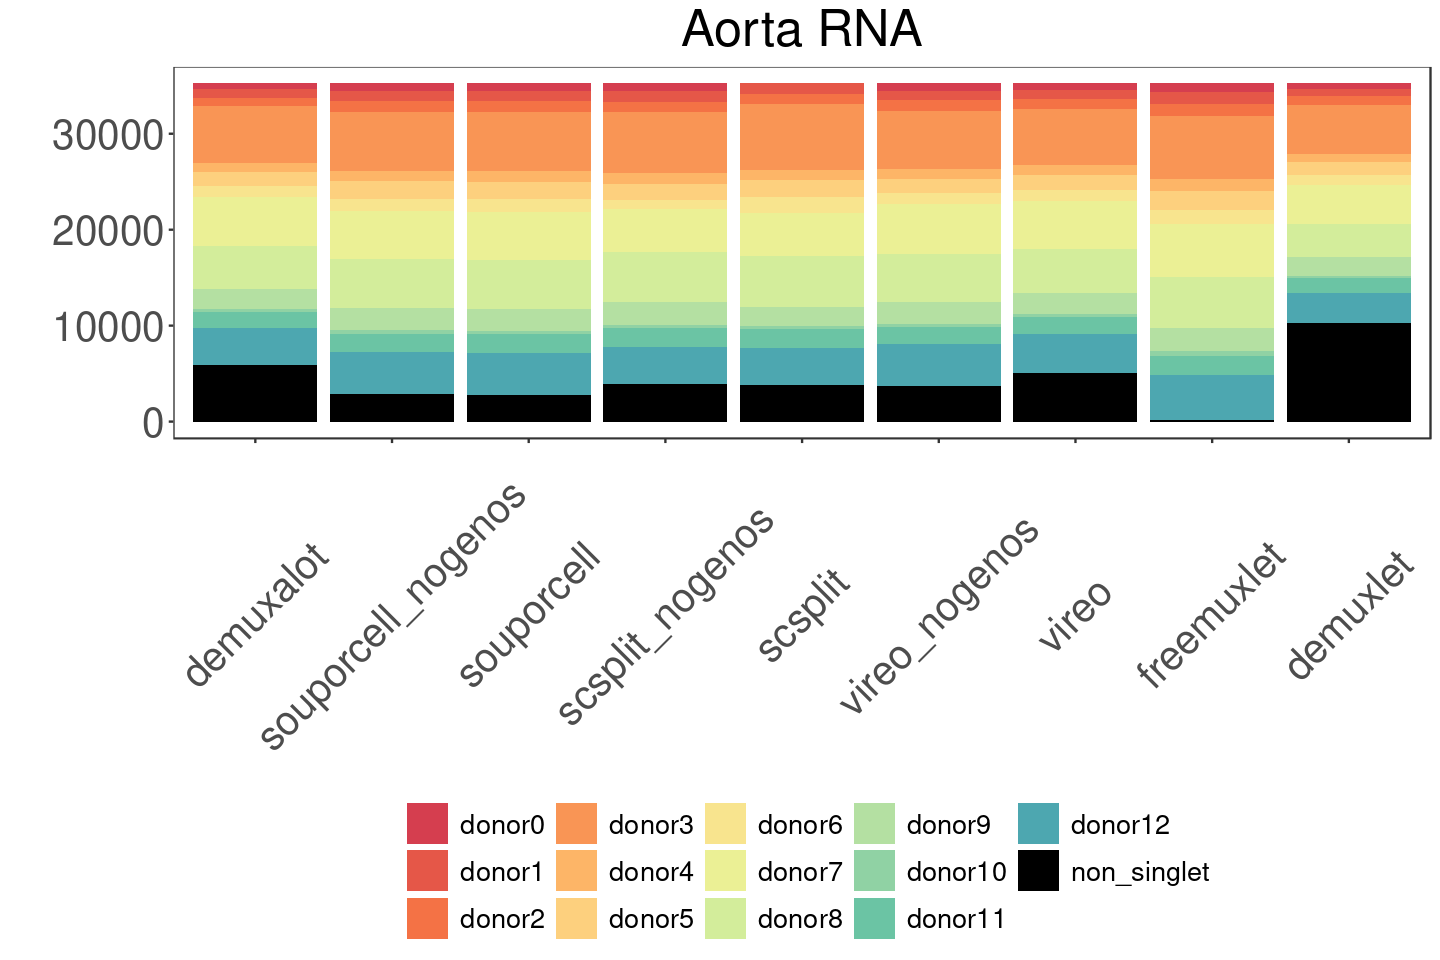

In [38]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(adelus_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=0.4),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'bottom',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
#     scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta RNA",fill='Assignment') +
    scale_fill_manual(values = adelus_palette) +
  guides(fill = guide_legend(title = NULL, override.aes = list(size = 1.5)))


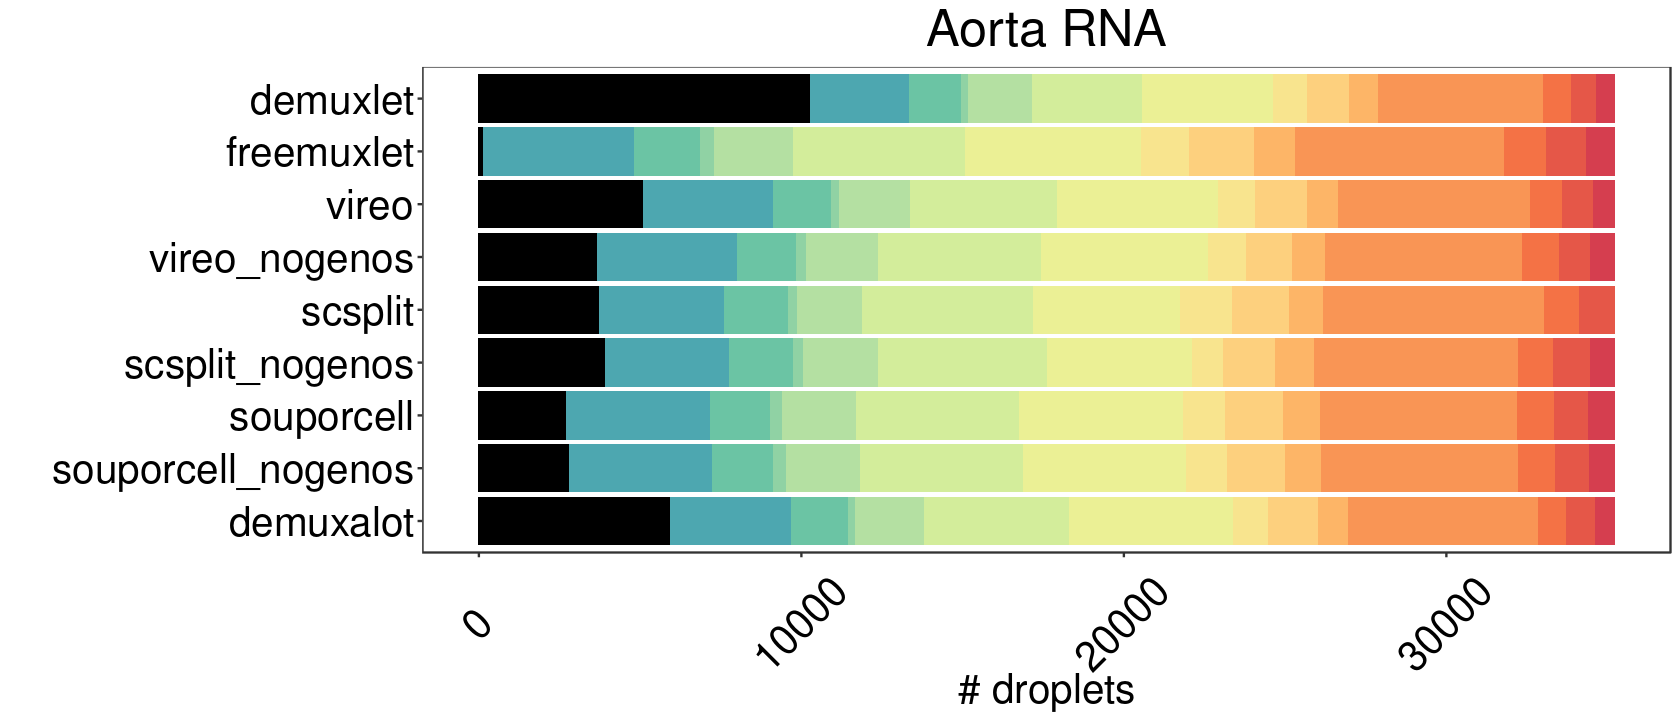

In [42]:
options(repr.plot.width=14, repr.plot.height=6)

p3 <- ggplot(adelus_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=0.4, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
#     scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta RNA",fill='Assignment',y='# droplets') +
    scale_fill_manual(values = adelus_palette) +
coord_flip()
p3

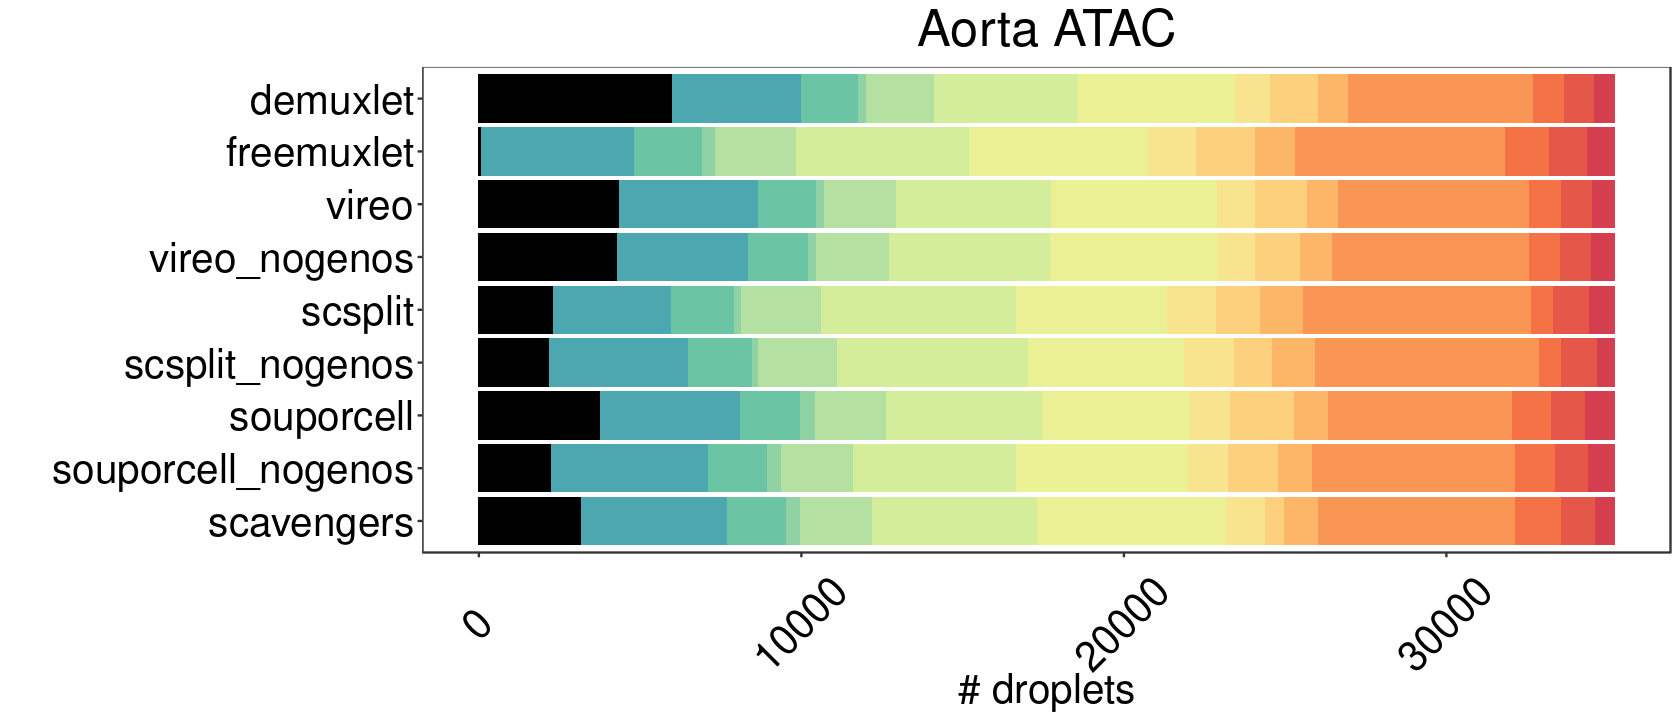

In [43]:
options(repr.plot.width=14, repr.plot.height=6)

p4 <- ggplot(adelus_atac_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=0.4, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta ATAC",fill='Assignment', y='# droplets') +
coord_flip()
p4

In [41]:
# prow <- plot_grid(p1, p2, p3, p4,
#   align = 'vh',
#   labels = c("A", "B", 'C', 'D'),
#   nrow = 2
# )
# combined_plot <- plot_grid(prow, rel_widths = c(4, .1), width=50)
# final_plot <- ggdraw() +
#   draw_text("Droplet type accuracy", x = 0.5, y = 0.98, hjust = 0.5, vjust = 1,
#             size = 25, color = "black", family = "arial") +
#   draw_plot(combined_plot, x = 0, y = 0, width = 1, height = 0.9)

# # Show the final plot
# print(final_plot)